In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Import various libraries

In [2]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib as mlp 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split

### Extract data
Upload csv files, extract testing, training data and validation data

In [3]:
digit_file_path = '/kaggle/input/digit-recognizer/train.csv'
digit_val_path = '/kaggle/input/digit-recognizer/test.csv'
digit_data = pd.read_csv(digit_file_path)
test_data = pd.read_csv(digit_val_path)
y = digit_data['label']
X = digit_data.loc[:, digit_data.columns != 'label'].to_numpy()
train_X, val_X, train_y, val_y = train_test_split(X, y)
# train_X = X
# train_y = y
test_X = test_data.to_numpy()
train_X.shape

(31500, 784)

### Test different digits
Convert an array of pixels into an image and display it

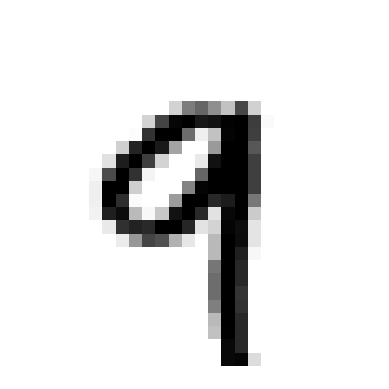

In [4]:
digit = train_X[5, :]
digit_pic = digit.reshape(28, 28)
plt.imshow(digit_pic, cmap='binary')
plt.axis('off')
plt.show()

### Create a neural net
<li>Input layer has 784 nodes
<li>First hidden layer has 25 nodes, ReLu activation function
<li>Second hidden layer has 15 nodes, ReLu activation function
<li>Third hidden layer has 10 nodes, softmax activation function

In [5]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=25, activation='relu', name='layer1'),
        Dense(units=15, activation='relu', name='layer2'),
        Dense(units=10, activation='softmax', name='layer3'),
    ], name='my_model'
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                19625     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


2023-02-21 03:03:01.578852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-21 03:03:01.578912: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


### Train neural net
<li>Use SparseCategoricalCrossEntropy loss function
<li>Optimiser is Adam function
<li>Training data is the training x and y data
<li>Validation data is the validation x and y data

In [6]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=40
)

Epoch 1/40
985/985 [==============================] - 3s 3ms/step - loss: 2.9380 - val_loss: 1.5935
Epoch 2/40
985/985 [==============================] - 2s 2ms/step - loss: 1.4467 - val_loss: 1.3021
Epoch 3/40
985/985 [==============================] - 3s 3ms/step - loss: 1.2183 - val_loss: 1.1548
Epoch 4/40
985/985 [==============================] - 2s 2ms/step - loss: 1.0740 - val_loss: 1.0182
Epoch 5/40
985/985 [==============================] - 2s 2ms/step - loss: 0.8449 - val_loss: 0.7266
Epoch 6/40
985/985 [==============================] - 2s 2ms/step - loss: 0.6693 - val_loss: 0.6012
Epoch 7/40
985/985 [==============================] - 2s 2ms/step - loss: 0.5356 - val_loss: 0.5228
Epoch 8/40
985/985 [==============================] - 2s 2ms/step - loss: 0.4507 - val_loss: 0.4458
Epoch 9/40
985/985 [==============================] - 3s 3ms/step - loss: 0.4124 - val_loss: 0.4646
Epoch 10/40
985/985 [==============================] - 2s 2ms/step - loss: 0.3867 - val_loss: 0.4027

### Plotting the convergence
As the plot shows, loss from training and validation data is quite good

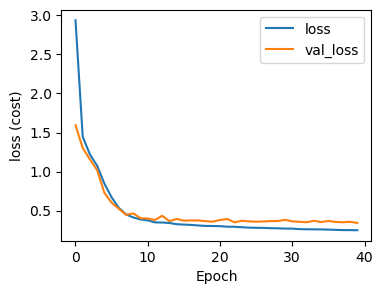

In [7]:
def plot_loss_tf(history):
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.plot(history.history['loss'], label='loss')
    
    ax.plot(history.history['val_loss'], label='val_loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
plot_loss_tf(history)

### Plot different result
As the below plots show, the results for the testing data is quite good

1/1 [==============================] - 0s 19ms/step


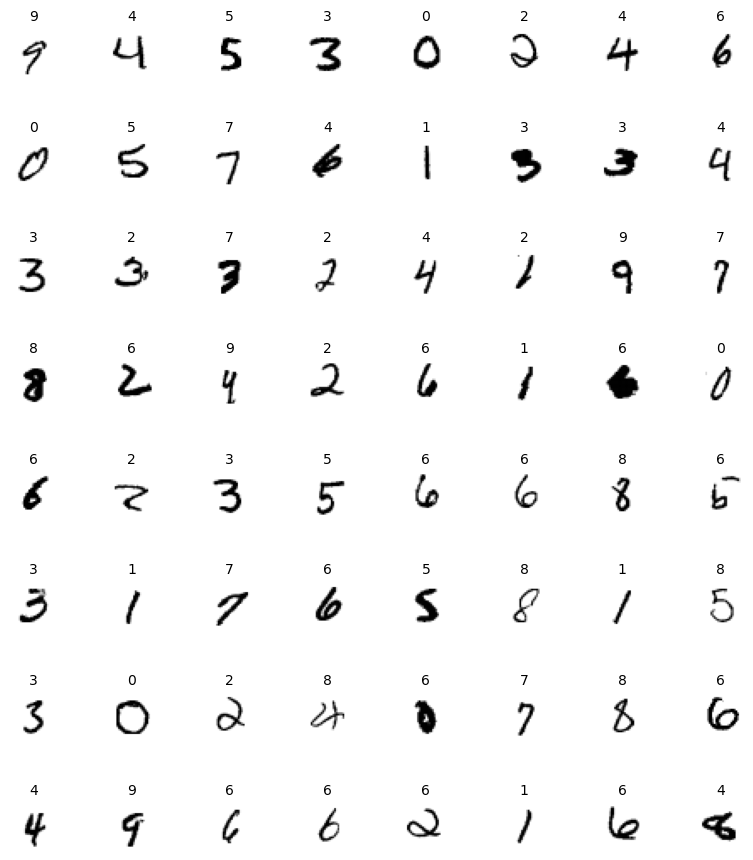

In [8]:
def plot_results():
    fig, axes = plt.subplots(8, 8, figsize=(8, 9))
    fig.tight_layout()
    m, n = test_X.shape
    for i, ax in enumerate(axes.flat):
        random_index = np.random.randint(m)
        random_digit = test_X[random_index]
        random_digit_reshaped = random_digit.reshape(28, 28)
        prediction = model.predict(random_digit.reshape(1, n))
        prediction_p = tf.nn.softmax(prediction)
        result = np.argmax(prediction_p)
#         print(train_y[random_index])
        ax.imshow(random_digit_reshaped, cmap='binary')
        ax.set_title(f"{result}", fontsize=10)
        ax.set_axis_off()
    plt.show()
    
plot_results()

### Submit the output

In [9]:
predictions = model.predict(test_X)
prediction_p = tf.nn.softmax(predictions)
result = [np.argmax(p) for p in prediction_p]
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label'] = result
submission.to_csv('submission.csv', index=False)

875/875 [==============================] - 1s 1ms/step
